 ## Six Steps to do that 
 * Download the dataset
 * Intializing the hugging face tokenizer and Model
 * Input data decode to get input_id and attention_tensors
 * build full model (input layer go bert and output layer post bert)
 * Optimizer, metrics and losses
 * Train the model

#### unzipe the dataset file

In [2]:
import pandas as pd
df = pd.read_csv('../input/sentiment-analysis-on-movie-reviews/train.tsv.zip', sep='\t')
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
# drop the redundant element form dataset
df.drop_duplicates(subset="SentenceId",keep= 'first', inplace=True)
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
63,64,2,"This quiet , introspective and entertaining in...",4
81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
116,117,4,A positively thrilling combination of ethnogra...,3
156,157,5,Aggressive self-glorification and a manipulati...,1


In [4]:
len(df)

8529

## Encoding data
we used bert tokenizer which is pretrained

In [5]:
seqlen= df['Phrase'].apply(lambda x: len(x.split()))

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Maximum data in a sentence')

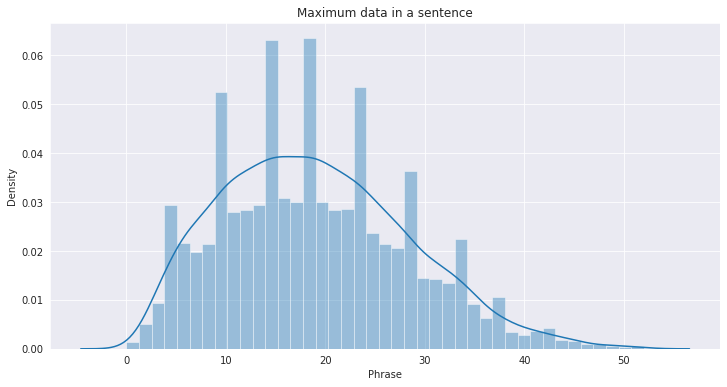

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.distplot(seqlen)
plt.title("Maximum data in a sentence")

In [8]:
SEQ_LEN=50

In [9]:
#import tokenizer
from transformers import AutoTokenizer

* `bert-base-cased` = Its usually make input as dataset. in sentiment analysis it better to used.(angry, sout word is always capital letter)
* `bert-based-uncased`  = its make all the input in lowercase.

In [10]:
tokenizer =AutoTokenizer.from_pretrained('bert-base-cased')  # analysis sentiment

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

In [11]:
token= tokenizer.encode_plus("Hello world", max_length= SEQ_LEN, truncation=True,  #truncation remove all the word grater than 50 
                            padding= 'max_length', add_special_tokens=True, return_token_type_ids=False,  #return_token_type_ids not important
                             return_attention_mask=True, return_tensors='tf' )

2021-10-19 11:45:27.513656: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-19 11:45:27.515471: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-19 11:45:27.516659: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-19 11:45:27.519841: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [12]:
token
#here 101 is SOS
#102 is EOS
# two tensors input_ids and attenton_mask
#8667 is id of hello and 1362 is world
#all the zero is padding and is ignore 
#aqttention mask is used for treat 1 is is king and  0 is ignore 


{'input_ids': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[ 101, 8667, 1362,  102,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int32)>}

In [13]:
# used for loop for total  dataset
import numpy as np

In [14]:
#intialized_two_arrays
Xids= np.zeros((len(df),SEQ_LEN))  #ids
Xmask=np.zeros((len(df), SEQ_LEN))  #sequence mask

In [15]:
Xids.shape

(8529, 50)

In [16]:
for i, sequences in enumerate(df['Phrase']):
    tokens=tokenizer.encode_plus(sequences, max_length= SEQ_LEN, truncation=True,  #truncation remove all the word grater than 50 
                            padding= 'max_length', add_special_tokens=True, return_token_type_ids=False,  #return_token_type_ids not important
                             return_attention_mask=True, return_tensors='tf' )
    Xids[i, :], Xmask[i, :]=tokens['input_ids'], tokens['attention_mask']

In [17]:
Xids

array([[ 101.,  138., 1326., ...,    0.,    0.,    0.],
       [ 101., 1188., 3589., ...,    0.,    0.,    0.],
       [ 101., 2431., 3899., ...,    0.,    0.,    0.],
       ...,
       [ 101.,  118.,  149., ...,    0.,    0.,    0.],
       [ 101., 1109., 2523., ...,    0.,    0.,    0.],
       [ 101., 1109., 1273., ...,    0.,    0.,    0.]])

In [18]:
Xmask

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [19]:
df['Sentiment'].unique   #last column of dataset

<bound method Series.unique of 0         1
63        4
81        1
116       3
156       1
         ..
155984    2
155997    2
156021    1
156031    1
156039    2
Name: Sentiment, Length: 8529, dtype: int64>

In [20]:
arr= df['Sentiment'].values  #use one hot into array from word
arr.size

8529

In [21]:
labels= np.zeros((arr.size, arr.max()+1))  #maximum values in the array (here is 4 see above) but 1 means 5 column we add

In [22]:
labels.shape

(8529, 5)

In [23]:
labels

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [24]:
#like zero array we want to add 1 for this 0 indices
labels[np.arange(arr.size), arr]=1  #add 1 basically define the sentiment(replace 4,3,2,1 index with 1) which is on hot encoding   
labels

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [25]:
# <!-- save for letter used -->
with open('xids.npy', 'wb') as f :
    np.save(f, Xids)
with open('xmask.npy', 'wb') as f :
    np.save(f, Xmask)
with open('labels.npy', 'wb') as f :
    np.save(f, labels)

In [26]:
del df, Xids, Xmask, labels    #empty the memory space

In [27]:
# Xids

In [28]:
# now open this in backe-end
with open('xids.npy', 'rb') as fp :
    Xids=np.load(fp)
with open('xmask.npy', 'rb') as fp :
    Xmask=np.load(fp)
with open('labels.npy', 'rb') as fp :
    labels=np.load(fp)

In [29]:
Xids

array([[ 101.,  138., 1326., ...,    0.,    0.,    0.],
       [ 101., 1188., 3589., ...,    0.,    0.,    0.],
       [ 101., 2431., 3899., ...,    0.,    0.,    0.],
       ...,
       [ 101.,  118.,  149., ...,    0.,    0.,    0.],
       [ 101., 1109., 2523., ...,    0.,    0.,    0.],
       [ 101., 1109., 1273., ...,    0.,    0.,    0.]])

In [30]:
#put all the data onto tensorflow because its make things lot easiar
#restructure data, shuffle, batch, just few line code
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [31]:
#restructure the data
#remember tensorflow expect input data always a tuple
#but here we using bert so tuple look like dictonary

In [32]:
#restructure the data
#remember tensorflow expect input data always a tuple
#but here we using bert so tuple look like dictonary not other dictionary but ids and mask
dataset= tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

In [33]:
# create a generatoe where all our data in tuple formate conatains (,1 x id, 1 maskid  and 1 labels id  )
for i in dataset.take(1):  #view on of those
    print(i)

(<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([  101.,   138.,  1326.,  1104., 13936., 25265., 16913., 15107.,
        1103.,  8050.,  2553.,  1115.,  1184.,  1110.,  1363.,  1111.,
        1103., 20398.,  1110.,  1145.,  1363.,  1111.,  1103.,   176.,
        9900.,   117.,  1199.,  1104.,  1134.,  5411.,  1821., 14225.,
        1133.,  3839.,  1104.,  1134.,  7919.,  1106.,  1277.,  1104.,
         170.,  1642.,   119.,   102.,     0.,     0.,     0.,     0.,
           0.,     0.])>, <tf.Tensor: shape=(50,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])>, <tf.Tensor: shape=(5,), dtype=float64, numpy=array([0., 1., 0., 0., 0.])>)


Previously discuss that tensorflow expect our output as tuple formate so `index[0]` have to represent as input and `index[1]` should be represent as labels but here have three types data so how could we process them?

In [34]:
# to create this structure we need a mapping function
def map_function(input_ids, masks, labels):
    return { 'input_ids': input_ids, 'attention_mask': masks}, labels

In [35]:
dataset = dataset.map(map_function)

In [36]:
for i in dataset.take(1):  #view on of those
    print(i)

({'input_ids': <tf.Tensor: shape=(50,), dtype=float64, numpy=
array([  101.,   138.,  1326.,  1104., 13936., 25265., 16913., 15107.,
        1103.,  8050.,  2553.,  1115.,  1184.,  1110.,  1363.,  1111.,
        1103., 20398.,  1110.,  1145.,  1363.,  1111.,  1103.,   176.,
        9900.,   117.,  1199.,  1104.,  1134.,  5411.,  1821., 14225.,
        1133.,  3839.,  1104.,  1134.,  7919.,  1106.,  1277.,  1104.,
         170.,  1642.,   119.,   102.,     0.,     0.,     0.,     0.,
           0.,     0.])>, 'attention_mask': <tf.Tensor: shape=(50,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])>}, <tf.Tensor: shape=(5,), dtype=float64, numpy=array([0., 1., 0., 0., 0.])>)


2021-10-19 11:45:39.797724: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [37]:
dataset= dataset.shuffle(100000).batch(32)  #shuffle and batch dataset

In [38]:
#split into training and validation
DS_LEN = len(list(dataset))  #dont take len directly so by using list we have count that
DS_LEN  #number of batches

267

In [39]:
# if we take 9 for training and 1 for testing 
SPLIT =.9

train =dataset.take(round(DS_LEN*SPLIT))
val =dataset.skip(round(DS_LEN*SPLIT))
del(dataset)

Data is Ready so Now time to building **model architecture**

In [40]:
from transformers import TFAutoModel

In [41]:
bert = TFAutoModel.from_pretrained('bert-base-cased')  #same as before
# imported bert 
#now we need to buld a network around bert

Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [42]:
#define the input shape and name
input_ids= tf.keras.layers.Input(shape=(SEQ_LEN),name='input_ids', dtype='int32')  #nam same as before used to create disctionary
mask= tf.keras.layers.Input(shape=(SEQ_LEN),name='attention_mask', dtype='int32')

embeddings=bert(input_ids, attention_mask=mask)[0]  #pull those into embedding  #take first tensors

#bert will return two tensor two us
#one of those is last hidden_state what we are interested in that is a 3d tensors which provide all the ingormation 
#second tensor we are going to ignore called puller output which run through feed forward or linear activation return a 2d tensors used for
#...classification we will create ourselv so not need it

In [43]:
# Here we can add LSTM, convoltion, pooling or anything for experiment.
#for keep simple we are used global maxpooling layer which convert output from 3d to 2d
# you can ignore this by previosly doing 0 by giving 1
X = tf.keras.layers.GlobalMaxPool1D()(embeddings)
#now normalied our output here before train the model
X = tf.keras.layers.BatchNormalization()(X)
# now go through with dense layer wich classification bert embedding
X = tf.keras.layers.Dense(128, activation='relu')(X)  
X = tf.keras.layers.Dropout(0.1)(X)  # prevent overfiting
X =  tf.keras.layers.Dense(32, activation='relu')(X) #another dense layers

#finally lets create a output layers with softmax
y = tf.keras.layers.Dense(5,activation='softmax', name='output')(X)

In [44]:
# now tell tensorflow which is our input and output layer
model =tf.keras.Model(inputs= [input_ids, mask], outputs=y)

In [45]:
#we have a  model now excute that
model.summary()  #without_freze

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 50)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 50)]         0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 108310272   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
global_max_pooling1d (GlobalMax (None, 768)          0           tf_bert_model[0][0]          

In [46]:
#bert is a very big model i would not recomand to train it unlsess have specific reason
#by freezing layers we can reduce parameter
model.layers[2].trainable=False  #128 dense will be freze

In [47]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 50)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 50)]         0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 108310272   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
global_max_pooling1d (GlobalMax (None, 768)          0           tf_bert_model[0][0]          

In [48]:
optimizer = tf.keras.optimizers.Adam(0.01)
loss = tf.keras.losses.CategoricalCrossentropy() #becasue we using on hot encodiing
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')  #same reason
model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

# Run Just One Epoch 

In [49]:
history = model.fit(
    train,
    validation_data = val,
    epochs=1)

240/240 [==============================] - 46s 126ms/step - loss: 1.4723 - accuracy: 0.3551 - val_loss: 1.3756 - val_accuracy: 0.4099


Now practice with LSTM, COnvolution or more dense layers to increase the accuracy and play arround with it. 